Collected 35 articles.
Links for Computer science: {'Project management', 'Glossary of cell biology', 'Glossary of geology', 'Software verification and validation', 'History of computing hardware (1960s–present)', 'Floating-point arithmetic', 'Binary number', 'Compiler construction', 'Computational linguistics', 'Supercomputer', 'Herbert A. Simon', 'Glossary of quantum computing', 'Image compression', 'E-commerce', 'Algorithmic game theory', 'History of laptops', 'History of computer hardware in Yugoslavia', 'Speech synthesis', 'Computer hardware', 'Integrated development environment', 'Glossary of archaeology', 'History of software', 'Signal processing', 'Computational physics', 'Human–computer interaction', 'Glossary of engineering: M–Z', 'Computer network', 'Glossary of architecture', 'Glossary of Hebrew toponyms', 'Medical image computing', 'Site reliability engineering', 'Glossary of ichthyology', 'Rózsa Péter', 'Knowledge representation and reasoning', 'Cross-validation (statisti

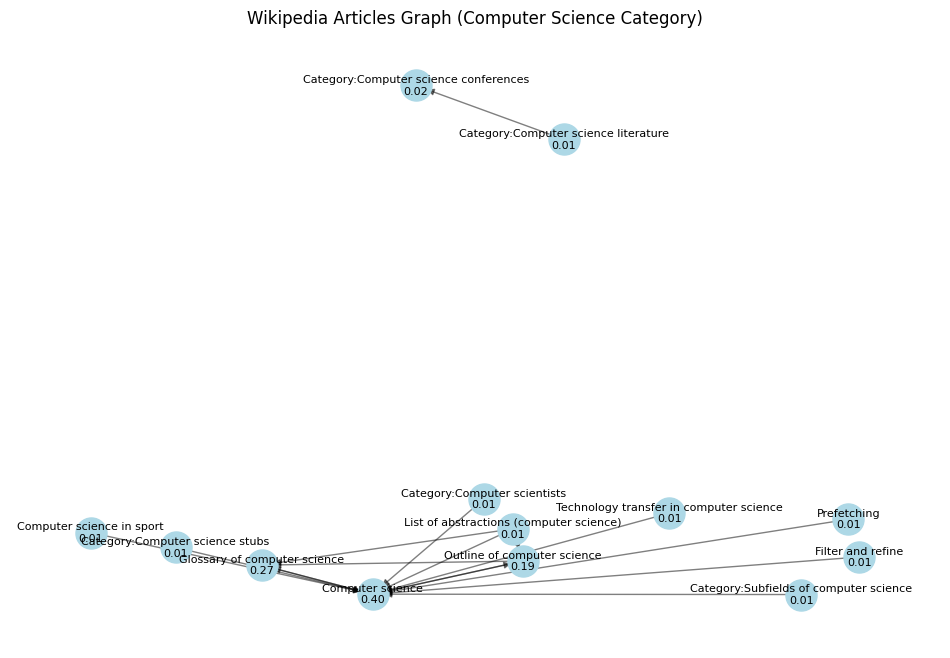

In [43]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from time import sleep

def get_category_members(category, limit=50):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "list": "categorymembers",
        "cmtitle": f"Category:{category}",
        "cmlimit": limit,
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "error" in data:
        print(f"Error fetching category members: {data['error']}")
        return []

    return [article["title"] for article in data["query"].get("categorymembers", [])]

def get_links_from_article(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "links",
        "titles": title,
        "pllimit": "max"
    }

    response = requests.get(url, params=params)
    data = response.json()
    pages = data["query"]["pages"]
    links = set()

    for page_id, page_data in pages.items():
        if "links" in page_data:
            for link in page_data["links"]:
                links.add(link["title"])
    return links

category = "Computer science"
articles = get_category_members(category, limit=50)

print(f"Collected {len(articles)} articles.")

edges = []
for article in articles:
    links = get_links_from_article(article)
    print(f"Links for {article}: {links}")

    for link in links:
        if link in articles:
            edges.append((article, link))
    sleep(0.5)

print(f"Total edges collected: {len(edges)}")
print(f"Sample edges: {edges[:5]}")

G = nx.DiGraph()
G.add_edges_from(edges)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
    page_rank = nx.pagerank(G)
    top_nodes = sorted(page_rank.items(), key=lambda x: x[1], reverse=True)[:3]

    print("Top articles by PageRank:")
    for node, score in top_nodes:
        print(f"Article: {node}, PageRank Score: {score}")

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    labels = {node: f"{node}\n{score:.2f}" for node, score in page_rank.items()}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title("Wikipedia Articles Graph (Computer Science Category)")
    plt.axis('off')
    plt.show()

else:
    print("Graph is empty")


df = pd.DataFrame(edges, columns=["Source", "Target"])
df.to_csv("wikipedia_cs_network.csv", index=False)
